In [1]:
#Import our standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Wine Dataset
fname = "boston.csv"
df = pd.read_csv(fname) 

In [3]:
#Glimpse of data
df.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


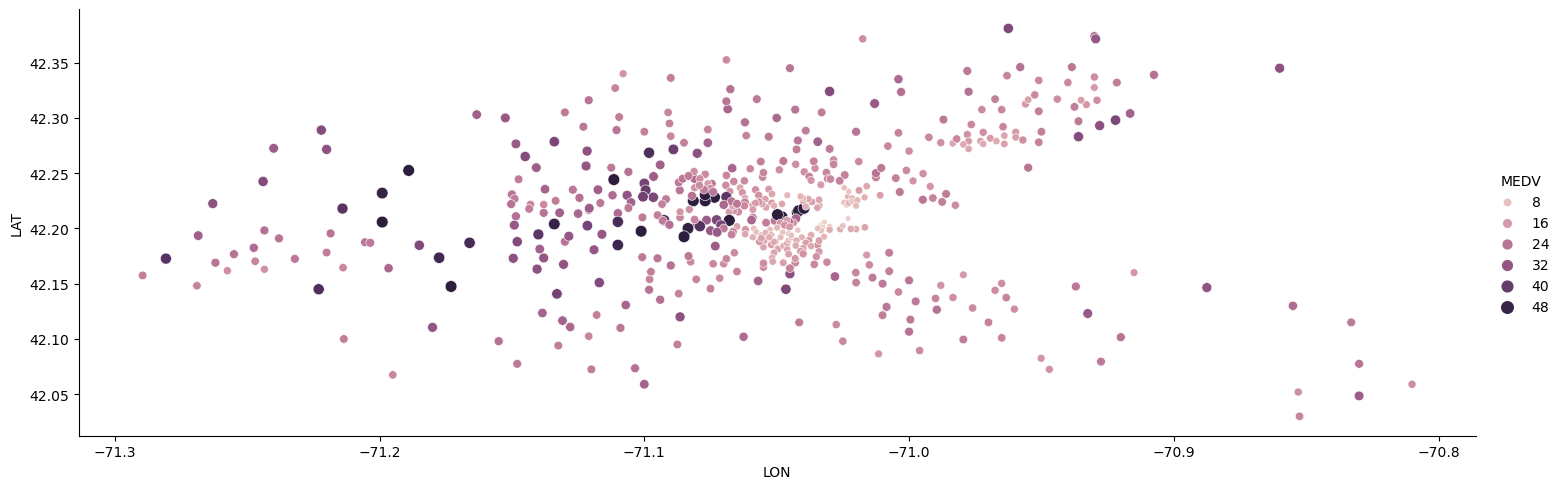

In [4]:
sns.relplot(data = df,
            x = 'LON',
            y = 'LAT',
            size = 'MEDV',
            hue = 'MEDV',
            kind = 'scatter',
            s = 100,
            aspect =3 )

In [5]:
df.shape

(506, 16)

In [6]:
#Create Independent and Dependent Variables
X = df.drop(['MEDV','TOWN','TRACT'], axis = 1)
y = df['MEDV']

In [7]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

# Linear Regression

In [8]:
#Load Decision Trees
from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()

In [9]:
lrMod = lin_regression.fit(X, y)

In [10]:
#Predict the price for test data
lrPred = lrMod.predict(X_test)
lrPred

array([37.45953582, 25.22141763, 35.17125048, 16.21125017, 23.6274506 ,
       16.07514172, 17.33674061, 21.03493549, 18.84177555, 38.40177624,
       24.15701445, 25.58055377, 34.72430521, 33.67338439, 18.18198999,
       28.75266222, 20.80146753, 28.77221165, 23.26268706, 15.493834  ,
       17.27805598, 32.8549035 , 15.92651016, 30.29915115, 25.49970551,
       32.1096376 , 41.56737991,  9.98097548, 21.14280077, 11.9735379 ,
       20.82303453, 23.68514352, 33.21530912, 13.6536686 , 23.02044672,
       33.62982086, 34.93152249, 17.48142794, 26.37272472, 18.86385202,
       27.35771206, 16.57994495, 16.91949464, 25.8896039 , 25.06944935,
       21.69552319, 20.84548094, 27.21041847, 15.53107975, 31.37954293,
        8.05430943, 37.7434254 , 27.027434  , 31.63778743, 20.02154875,
       17.7603515 , 20.13856388, 21.03598597, 11.46628181,  8.57853027,
       22.61922798, 32.59646386, 25.85987074,  9.92638519, 21.84849757,
       25.10348918, 19.0771824 , 32.9804076 , 24.18037346, 18.78

In [11]:
#accuracy for regression using RMSE and R2
from sklearn.metrics import mean_squared_error, r2_score
print("R2: ", r2_score(y_test, lrPred))
print("RMSE: ", mean_squared_error(y_test, lrPred))

R2:  0.6452950760921075
RMSE:  40.369988820130295


In [12]:
#Check the accuracy of the model
print('training accuracy:', lrMod.score(X, y))
print('test accuracy:',lrMod.score(X_test, y_test))

training accuracy: 0.6729332306211135
test accuracy: 0.6452950760921075


# Decision Trees

In [13]:
#Load Decision Trees
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

In [14]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [15]:
#A funtion to print the gridsearch result
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [16]:
#Create an object of Decision Tree Regressor and Fit the model
RTree = DecisionTreeRegressor(random_state = 0, max_depth = 5)
RTree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

C:\Users\mahendras1\AppData\Local\Temp\ipykernel_7600\418010746.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


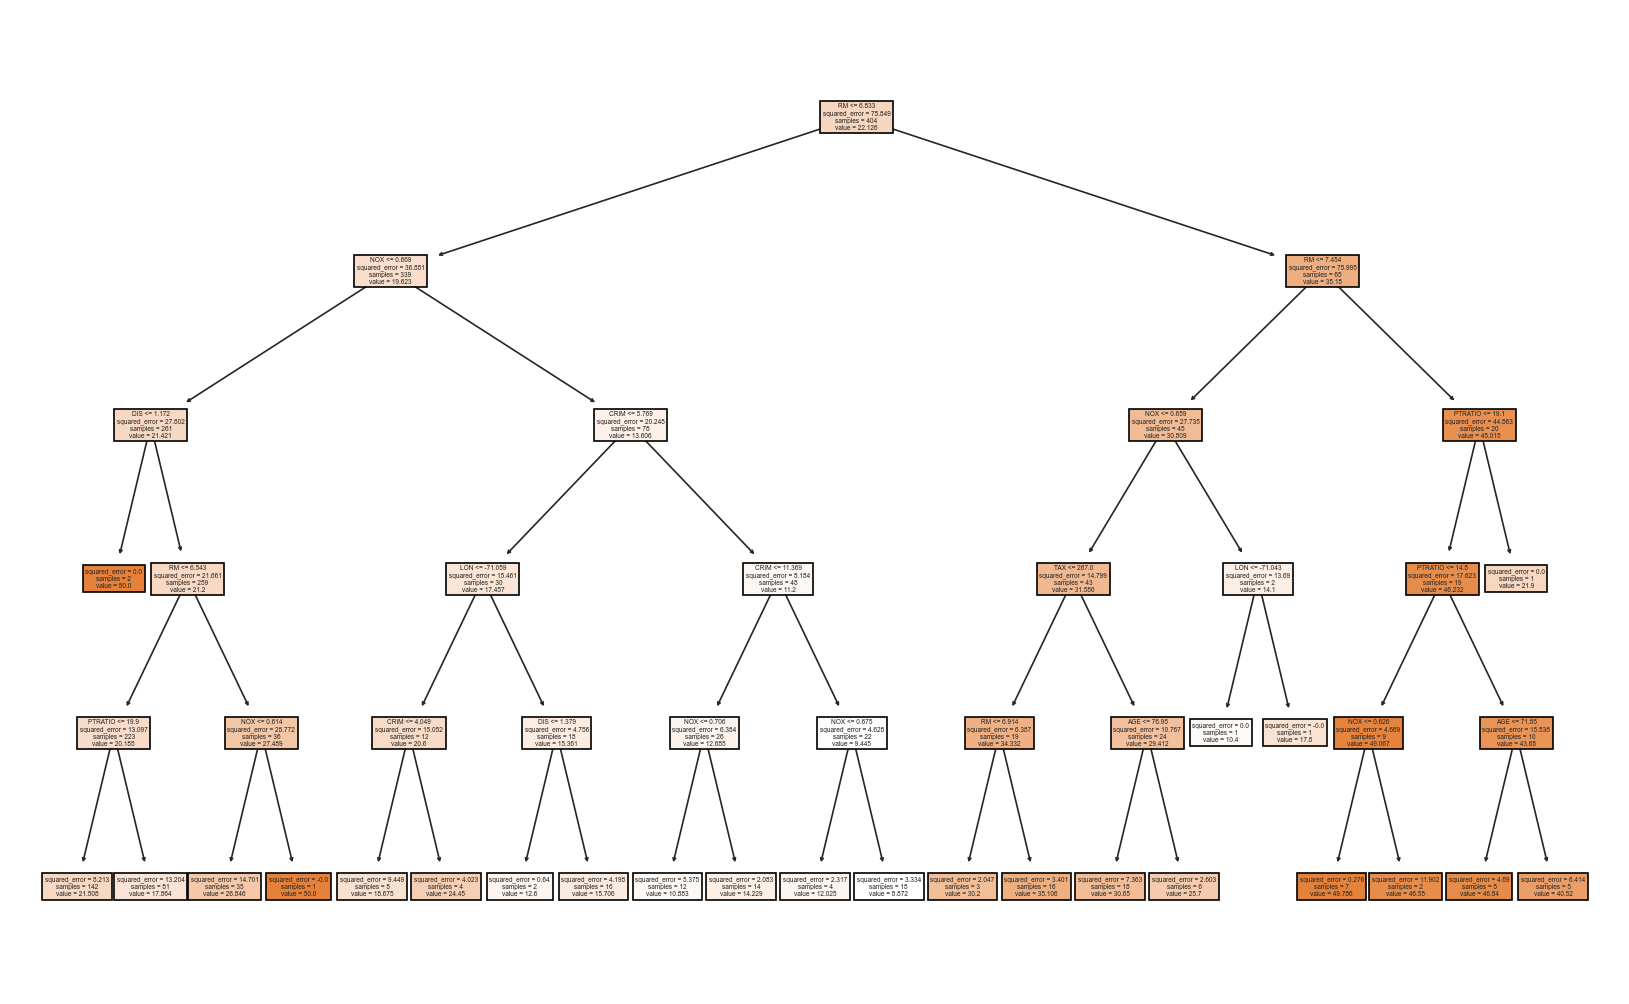

In [17]:
#Visualise the Decision Tree
plt.style.use('seaborn')
fig = plt.figure(figsize=(5,3), dpi = 400)
_ = plot_tree(RTree, 
                   feature_names=X.columns,
                   filled=True)
plt.show()

In [18]:
#Predict the price for test data
predictions = RTree.predict(X_test)
predictions

array([35.10625   , 21.5084507 , 35.10625   , 21.5084507 , 26.84571429,
       21.5084507 , 15.70625   , 21.5084507 , 10.88333333, 49.78571429,
       21.5084507 , 21.5084507 , 49.78571429, 26.84571429, 24.45      ,
       21.5084507 , 17.86419753, 25.7       , 25.7       , 17.86419753,
       17.86419753, 46.84      , 14.22857143, 26.84571429, 21.5084507 ,
       26.84571429, 46.55      ,  8.87222222, 17.86419753,  8.87222222,
       18.675     , 17.8       , 26.84571429,  8.87222222, 26.84571429,
       30.65      , 26.84571429,  8.87222222, 21.5084507 , 17.86419753,
       21.5084507 , 17.86419753, 17.86419753, 21.5084507 , 21.5084507 ,
       21.5084507 , 17.86419753, 35.10625   , 17.86419753, 25.7       ,
        8.87222222, 46.84      , 26.84571429, 26.84571429, 21.5084507 ,
       17.86419753, 21.5084507 , 17.86419753, 18.675     , 17.86419753,
       21.5084507 , 30.65      , 26.84571429, 17.86419753, 21.5084507 ,
       21.5084507 , 14.22857143, 30.65      , 21.5084507 , 21.50

In [19]:
#Check the accuracy of the model
print('training accuracy:', RTree.score(X_train, y_train))
print('test accuracy:',RTree.score(X_test, y_test))

training accuracy: 0.8902432090098111
test accuracy: 0.58316555998193


In [20]:
print("R2: ", r2_score(y_test, predictions))
print("RMSE: ", mean_squared_error(y_test, predictions))

R2:  0.58316555998193
RMSE:  47.441127960615624


In [21]:
#try ccp
param_grid = {
    "ccp_alpha":[0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]
}

gridsearch_cp = GridSearchCV(DecisionTreeRegressor(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_cp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2,
                                       0.3, 0.4, 0.5]})

In [22]:
print_results(gridsearch_cp)

BEST PARAMS: {'ccp_alpha': 0.1}

0.71 (+/-0.159) for {'ccp_alpha': 0.001}
0.709 (+/-0.159) for {'ccp_alpha': 0.005}
0.707 (+/-0.154) for {'ccp_alpha': 0.01}
0.724 (+/-0.134) for {'ccp_alpha': 0.05}
0.729 (+/-0.116) for {'ccp_alpha': 0.1}
0.728 (+/-0.127) for {'ccp_alpha': 0.15}
0.72 (+/-0.13) for {'ccp_alpha': 0.2}
0.714 (+/-0.145) for {'ccp_alpha': 0.3}
0.692 (+/-0.17) for {'ccp_alpha': 0.4}
0.692 (+/-0.168) for {'ccp_alpha': 0.5}


In [23]:
print('CCP Score:', gridsearch_cp.best_score_)
print('CCP Parameters:', gridsearch_cp.best_params_)

CCP Score: 0.7285154085996559
CCP Parameters: {'ccp_alpha': 0.1}


In [24]:
#Take the best estimator
bestCtree_cp = gridsearch_cp.best_estimator_

In [25]:
pred_cp = bestCtree_cp.predict(X_test)

In [26]:
#Check the accuracy of the model
print('training accuracy:', bestCtree_cp.score(X_train, y_train))
print('test accuracy:',bestCtree_cp.score(X_test, y_test))

training accuracy: 0.9501562059692773
test accuracy: 0.573614384687531


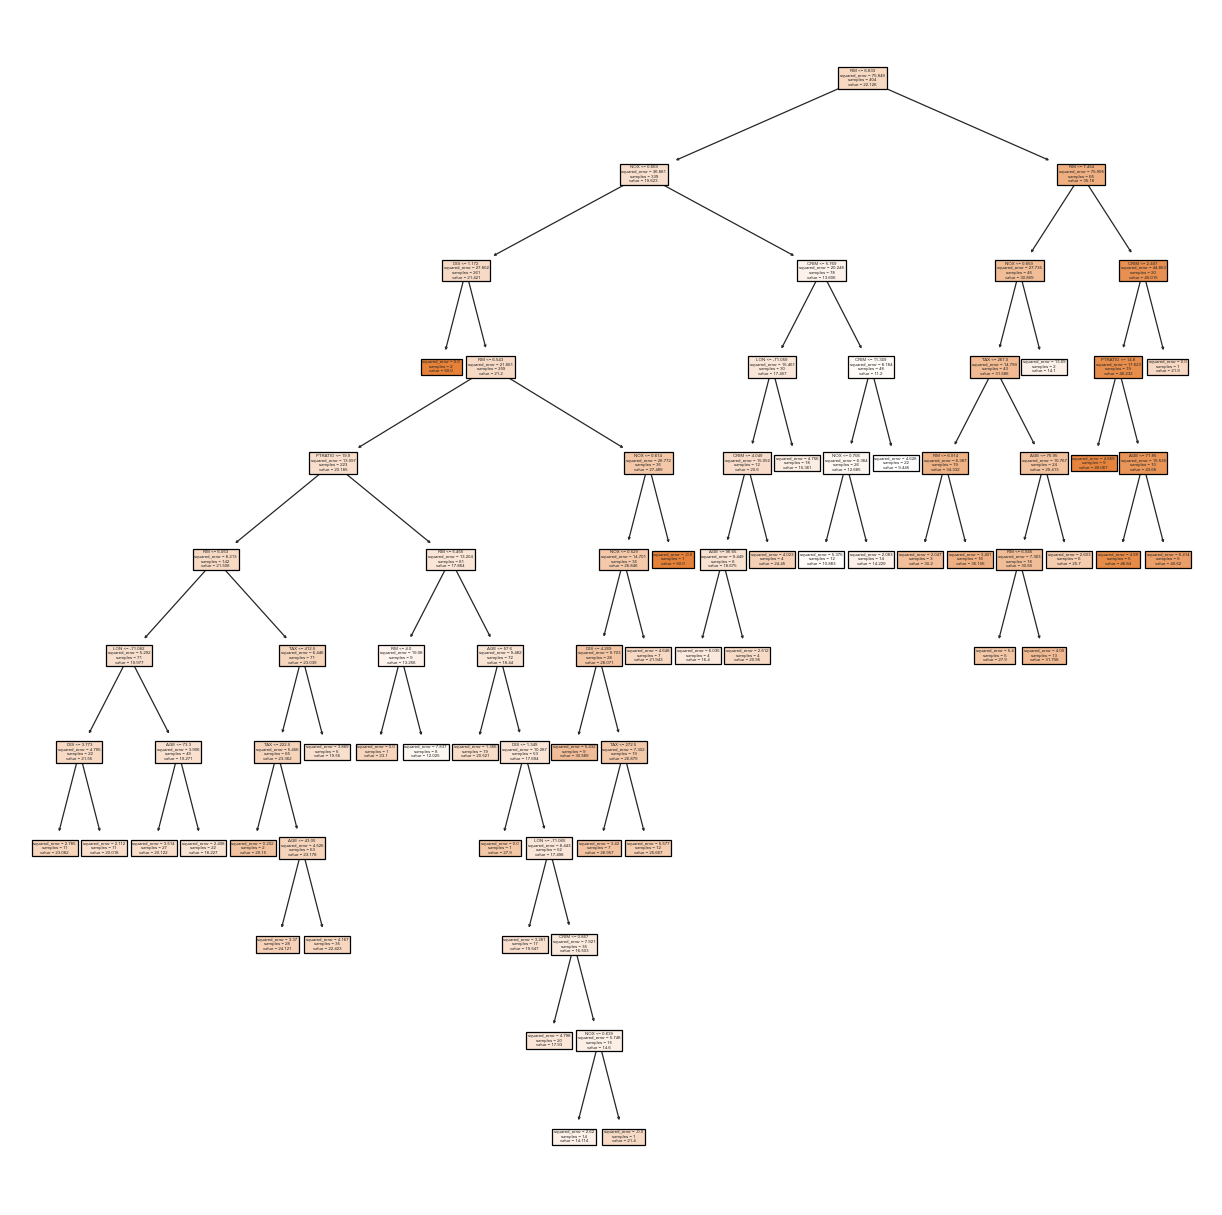

In [27]:
fig = plt.figure(figsize=(5,5), dpi = 300)
_ = plot_tree(bestCtree_cp, 
                   feature_names=X.columns,
                   filled=True)

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rnd_reg = RandomForestRegressor(
    n_estimators = 200,
    max_depth = 10,
    n_jobs = -1,
    random_state = 0
)

In [30]:
rnd_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1, random_state=0)

In [31]:
rf_pred = rnd_reg.predict(X_test)

In [32]:
print(rnd_reg.score(X_test, y_test))

0.757291228269051


In [33]:
#Check the accuracy of the model
print('training accuracy:', rnd_reg.score(X_train, y_train))
print('test accuracy:',rnd_reg.score(X_test, y_test))

training accuracy: 0.9639836202196053
test accuracy: 0.757291228269051


In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [35]:
#try ccp
param_grid = {
    "max_depth":[5, 7, 8, 10, 12, 14, 15],
    "n_estimators":[50,75,100,150,200,300,400,500]
}

gridsearch_rf = GridSearchCV(
                        RandomForestRegressor(random_state = 0),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 8, 10, 12, 14, 15],
                         'n_estimators': [50, 75, 100, 150, 200, 300, 400,
                                          500]})

In [36]:
#A funtion to print the gridsearch result
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [37]:
print_results(gridsearch_rf)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.761 (+/-0.091) for {'max_depth': 5, 'n_estimators': 50}
0.758 (+/-0.098) for {'max_depth': 5, 'n_estimators': 75}
0.759 (+/-0.104) for {'max_depth': 5, 'n_estimators': 100}
0.756 (+/-0.107) for {'max_depth': 5, 'n_estimators': 150}
0.755 (+/-0.109) for {'max_depth': 5, 'n_estimators': 200}
0.755 (+/-0.111) for {'max_depth': 5, 'n_estimators': 300}
0.756 (+/-0.113) for {'max_depth': 5, 'n_estimators': 400}
0.757 (+/-0.114) for {'max_depth': 5, 'n_estimators': 500}
0.779 (+/-0.081) for {'max_depth': 7, 'n_estimators': 50}
0.776 (+/-0.088) for {'max_depth': 7, 'n_estimators': 75}
0.776 (+/-0.097) for {'max_depth': 7, 'n_estimators': 100}
0.775 (+/-0.097) for {'max_depth': 7, 'n_estimators': 150}
0.773 (+/-0.099) for {'max_depth': 7, 'n_estimators': 200}
0.772 (+/-0.103) for {'max_depth': 7, 'n_estimators': 300}
0.773 (+/-0.106) for {'max_depth': 7, 'n_estimators': 400}
0.774 (+/-0.106) for {'max_depth': 7, 'n_estimators': 500}
0.782 (+

In [38]:
print('CCP Score:', gridsearch_rf.best_score_)
print('CCP Parameters:', gridsearch_rf.best_params_)

CCP Score: 0.7871416689419766
CCP Parameters: {'max_depth': 10, 'n_estimators': 50}


In [39]:
#Take the best estimator
bestCtree_rf = gridsearch_rf.best_estimator_

In [40]:
pred_rf = bestCtree_rf.predict(X_test)

In [41]:
print(bestCtree_rf.score(X_test, y_test))

0.7559404297465635


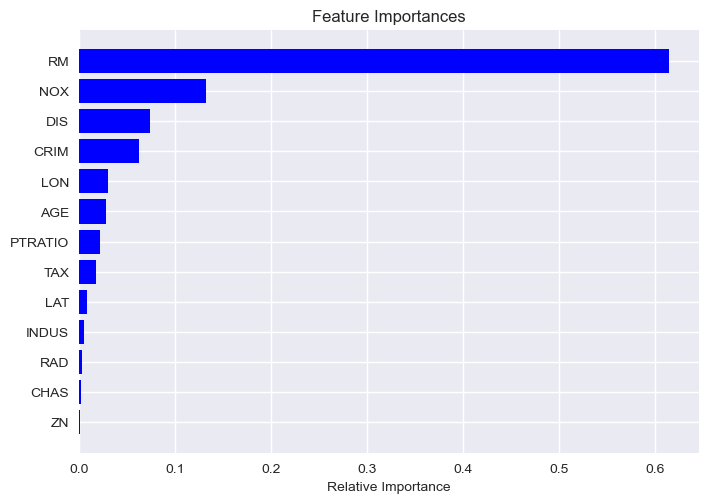

In [42]:
features = X_test.columns
importances = bestCtree_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XGBoost

In [46]:
!pip install xgboost
import xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 5.3 MB/s eta 0:00:00


In [49]:
xgb_clf = xgboost.XGBRegressor()

In [50]:
xgb_clf.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds = 2)

[0]	validation_0-rmse:18.98293
[1]	validation_0-rmse:14.23735
[2]	validation_0-rmse:11.13374
[3]	validation_0-rmse:8.87116
[4]	validation_0-rmse:7.52670
[5]	validation_0-rmse:6.73543
[6]	validation_0-rmse:6.26565
[7]	validation_0-rmse:5.99279
[8]	validation_0-rmse:5.70444
[9]	validation_0-rmse:5.55277
[10]	validation_0-rmse:5.41359
[11]	validation_0-rmse:5.31108
[12]	validation_0-rmse:5.22743
[13]	validation_0-rmse:5.20332
[14]	validation_0-rmse:5.16547
[15]	validation_0-rmse:5.15645
[16]	validation_0-rmse:5.13425
[17]	validation_0-rmse:5.09715
[18]	validation_0-rmse:5.08698
[19]	validation_0-rmse:5.07745
[20]	validation_0-rmse:5.07687
[21]	validation_0-rmse:5.06681
[22]	validation_0-rmse:5.06850
[23]	validation_0-rmse:5.04617
[24]	validation_0-rmse:5.02983
[25]	validation_0-rmse:5.03713
[26]	validation_0-rmse:5.03133


C:\Users\mahendras1\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
xgb_pred = xgb_clf.predict(X_test)

In [52]:
#Check the accuracy of the model
print('training accuracy:', xgb_clf.score(X_train, y_train))
print('test accuracy:',xgb_clf.score(X_test, y_test))

training accuracy: 0.9938246394805526
test accuracy: 0.7777121938998631


In [53]:
#try ccp
param_grid = {
    "learning_rate":[0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
}

gridsearch_XGB = GridSearchCV(xgboost.XGBRegressor(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                           0.3]})

In [54]:
print_results(gridsearch_XGB)

BEST PARAMS: {'learning_rate': 0.3}

-5.044 (+/-0.782) for {'learning_rate': 0.001}
-1.908 (+/-0.269) for {'learning_rate': 0.005}
-0.252 (+/-0.09) for {'learning_rate': 0.01}
0.807 (+/-0.113) for {'learning_rate': 0.05}
0.819 (+/-0.109) for {'learning_rate': 0.1}
0.812 (+/-0.107) for {'learning_rate': 0.2}
0.829 (+/-0.114) for {'learning_rate': 0.3}


In [55]:
print('CCP Score:', gridsearch_XGB.best_score_)
print('CCP Parameters:', gridsearch_XGB.best_params_)

CCP Score: 0.8290510622307288
CCP Parameters: {'learning_rate': 0.3}


In [56]:
#Take the best estimator
bestCtree_XGB = gridsearch_XGB.best_estimator_

In [57]:
pred_XGB = bestCtree_XGB.predict(X_test)

In [60]:
print(bestCtree_XGB.score(X_test, y_test))

0.7824206588934766


# Final Model